# 2.3 Lab: Introduction to Python

In [30]:
from operator import add
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


## 2.3.1 Basic Commands

In [2]:
x = [1, 3, 2, 5]
x

[1, 3, 2, 5]

In [3]:
x = [1, 6, 2]
x

[1, 6, 2]

In [4]:
y=[1,4,3]

In [5]:
len(x)

3

In [6]:
len(y)

3

The `map` function must be used to add two lists element-wise.
Using the `+` operator would concatenate the lists instead.

In [7]:
list(map(add, x, y))

[2, 10, 5]

`dir()` returns system variables in addition to user-defined variables so we have to search for the variables of interest in the set.

In [8]:
set(dir()).intersection({'x', 'y'})

{'x', 'y'}

In [9]:
del x
del y

In [10]:
set(dir()).intersection({'x', 'y'})

set()

In [11]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K'

In [12]:
x = np.array([[1, 3], [2, 4]])
x

array([[1, 3],
       [2, 4]])

In [13]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [14]:
np.sqrt(x)

array([[ 1.        ,  1.73205081],
       [ 1.41421356,  2.        ]])

In [15]:
np.square(x)

array([[ 1,  9],
       [ 4, 16]])

## 2.3.2 Graphics

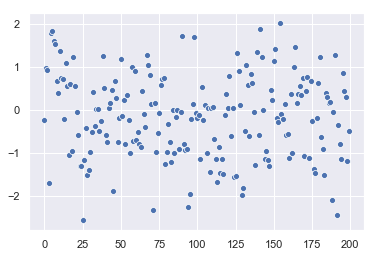

In [16]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.scatterplot(data=np.concatenate((x,y)))

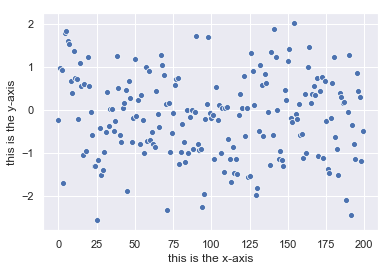

In [19]:
ax = sns.scatterplot(data=np.concatenate((x,y)))
ax.set(xlabel='this is the x-axis', ylabel='this is the y-axis')
plt.show()

[Instructions for how to save a plot into a PDF file](https://stackoverflow.com/questions/11328958/save-the-plots-into-a-pdf) are available on Stack Overflow.

`range()` returns a generator so `list()` must be used to extract all of its elements for printing.

In [23]:
x = list(range(1,11))
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [26]:
x = np.linspace(-np.pi, np.pi, 50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

Define the function that will calculate the z values based on x and y.

In [68]:
def f(x, y):
    return np.cos(y) / (1 + np.square(x))

This code is based on [an example](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html#Visualizing-a-Three-Dimensional-Function) in Jake Vanderplas's book, Python Data Science Handbook.

<a list of 11 text.Text objects>

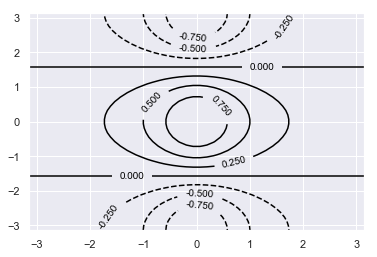

In [77]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contour_plot = plt.contour(X, Y, Z, colors='black')
plt.clabel(contour_plot, inline=1, fontsize=10)

<a list of 62 text.Text objects>

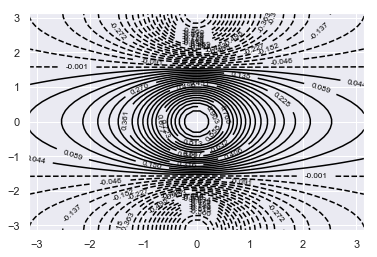

In [89]:
levels=np.linspace(np.min(Z), np.max(Z), 45)

contour_plot = plt.contour(X, Y, Z, levels=levels, colors='black')
plt.clabel(contour_plot, inline=1, fontsize=8)

Text(0.5,0,'f')

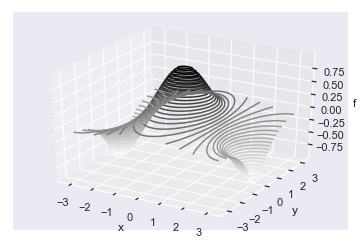

In [56]:
y = x
f = np.divide.outer(np.cos(y), np.square(x) + 1).T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, f, 40, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
#ax.view_init(60, 40)